In [10]:
# Importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import numpy as np
import plotly.express as px

In [11]:
# importing data through scrapped data which was transformed into dataframe and then exported to csv
            
batting_summary = pd.read_csv('batting_summary_T20worldcup2022.csv')

bowling_summary = pd.read_csv('bowling_summary_T20worldcup2022.csv')

batting_summary = batting_summary.drop("Unnamed: 0",axis=1)

bowling_summary = bowling_summary.drop("Unnamed: 0",axis=1)

Getting info on batting summary

In [12]:
batting_summary.shape  

(699, 10)

In [13]:
batting_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   batting_position  699 non-null    int64 
 1   Batter            699 non-null    object
 2   Dismissal         699 non-null    object
 3   Runs              699 non-null    int64 
 4   Balls             699 non-null    int64 
 5   Minutes           699 non-null    object
 6   4s                699 non-null    int64 
 7   6s                699 non-null    int64 
 8   SR                699 non-null    object
 9   Country           699 non-null    object
dtypes: int64(5), object(5)
memory usage: 54.7+ KB


In the above observation we notice that Minutes and SR(Strike rate) is in Object(String) format but it has to be integer and float format respectively.

In [14]:
# Converting Minutes and SR into integer and float respectively

batting_summary['Minutes'] = batting_summary['Minutes'].str.replace('-','1')
batting_summary['SR'] = batting_summary['SR'].str.replace('-','0')


batting_summary['Minutes'] = batting_summary['Minutes'].astype(int)
batting_summary['SR'] = batting_summary['SR'].astype(float)

batting_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   batting_position  699 non-null    int64  
 1   Batter            699 non-null    object 
 2   Dismissal         699 non-null    object 
 3   Runs              699 non-null    int64  
 4   Balls             699 non-null    int64  
 5   Minutes           699 non-null    int32  
 6   4s                699 non-null    int64  
 7   6s                699 non-null    int64  
 8   SR                699 non-null    float64
 9   Country           699 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 52.0+ KB


In [ ]:
batting_summary.describe()

In [ ]:
def corr(df):
    corr = df.corr(method = 'spearman')
    sns.heatmap(corr,annot=True)

df = batting_summary
corr(df)

From above correlation heatmap of batting_summary we observe that expect for batting_positin attribute, all Intezer and flaot attributes are in positive correlation.

Getting Info on bowlers summary

In [ ]:
bowling_summary.shape

In [ ]:
bowling_summary.info()

In [ ]:
# Dropping S.NO. attribute

bowling_summary = bowling_summary.drop('S.NO.',axis = 1)

bowling_summary.info()

In [ ]:
bowling_summary.describe()


In [ ]:
corr(bowling_summary)

In [ ]:
st.write("""
hello my first webpage
""")

In [ ]:
s = batting_summary.groupby(['Country']).agg({'Runs':'sum','Balls':'sum','Minutes':'sum','4s':'sum','6s':'sum','SR':'mean'})



In [ ]:
j = batting_summary.groupby(['batting_position',batting_summary['Country']=='England'])['Runs','6s'].sum()
k =pd.DataFrame(j)

k

In [ ]:
j = batting_summary.groupby(['Batter','Country'],as_index=False)['Runs','6s'].sum()

j

In [ ]:
j.first()

In [26]:
Impact_Player = batting_summary.groupby(['Batter'],as_index=False).agg({'Runs':'sum','Balls':'sum','Minutes':'sum','SR':'mean'}0)

Impact_Player

,Batter,Runs,Balls,Minutes,SR
0,Aaron Finch(c),107,97,196,111.720000
1,Aayan Afzal Khan,24,28,41,80.945000
2,Adam Zampa,1,3,8,50.000000
3,Afif Hossain,95,76,154,98.674000
4,Aiden Markram,99,79,146,122.832500
...,...,...,...,...,...
195,Wessly Madhevere,106,83,145,92.051250
196,Yasir Ali,5,9,20,64.443333
197,Zahoor Khan,1,1,15,100.000000
198,Zane Green(WK),2,3,3,66.660000


In [ ]:
filtered_condition = Impact_Player[Impact_Player['Balls']<40 & Impact_Player['SR']>200.0]

In [20]:
filtered_values = np.where((Impact_Player['SR']>=180) & (Impact_Player['Balls']>80))
o = Impact_Player.loc[filtered_values]

list(o.values[0])[1:]

[239, 126, 193, 26, 9, 182.58333333333334]

In [ ]:
fig = px.line_polar(o,r = [239,126,193,26,9,182.583333], theta = 'Batter', line_close=True, color = ['Runs','Balls','Minutes','4s','6s','SR'],template = 'none')

fig.update_traces(fill='toself')

fig.show()

In [10]:
list(o.columns)[1:]

['Runs', 'Balls', 'Minutes', '4s', '6s', 'SR']

In [12]:
list(o.values)[1:]

[]

In [ ]:
fig.show()

In [ ]:
df00 = pd.DataFrame({'Col A': ['home', 'other', 'used', 'new', 'service','service'],
                   'Col B': [6.797, 3.243, 12.567, 8.985, 1.345]})

In [ ]:
list(o.values)[1:]

In [21]:
fig = px.line_polar(r=list(o.values[0])[1:], theta=list(o.columns)[1:],line_close=True,template = None)
fig.update_traces(fill='toself')
fig.show()

In [27]:
batting_summary

,batting_position,Batter,Dismissal,Runs,Balls,Minutes,4s,6s,SR,Country
0,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,7,0,0,50.00,Namibia
1,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,15,1,0,100.00,Namibia
2,3,Jan Nicol Loftie-Eaton,c (WK)Mendis b Karunaratne,20,12,18,1,2,166.66,Namibia
3,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,49,2,0,108.33,Namibia
4,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,30,0,0,83.33,Namibia
...,...,...,...,...,...,...,...,...,...,...
694,3,Phil Salt,c Iftikhar Ahmed b Haris Rauf,10,9,16,2,0,111.11,England
695,4,Ben Stokes,not out,52,49,81,5,1,106.12,England
696,5,Harry Brook,c Shaheen Shah Afridi b Shadab Khan,20,23,36,1,0,86.95,England
697,6,Moeen Ali,b Mohammad Wasim,19,13,30,3,0,146.15,England


In [34]:
overall_data = batting_summary.groupby(['Country','Batter','batting_position'],as_index=False).agg({'Runs':'sum','Balls':'sum','Minutes':'sum','4s':'sum','6s':'sum','SR':'mean'})

In [33]:
overall_data = overall_data.sort_values(by=['batting_position'])

overall_data[overall_data['batting_position']==3]

,Country,Batter,batting_position,Runs,Balls,Minutes,4s,6s,SR
128,Namibia,Jan Nicol Loftie-Eaton,3,21,18,35,1,2,91.660000
8,Afghanistan,Ibrahim Zadran,3,80,83,131,6,2,100.333333
306,Zimbabwe,Sean Williams,3,1,1,10,0,0,100.000000
300,Zimbabwe,Regis Chakabva(WK),3,5,22,27,1,0,15.625000
297,Zimbabwe,Milton Shumba,3,16,25,46,2,0,66.665000
238,Sri Lanka,Dhananjaya de Silva,3,146,112,207,13,3,88.317143
277,West Indies,Evin Lewis,3,28,36,70,1,0,77.775000
156,Netherlands,Tom Cooper,3,67,48,72,4,3,147.275000
274,West Indies,Brandon King,3,17,15,24,3,0,113.330000
315,Zimbabwe,Wessly Madhevere,3,22,24,30,4,0,57.890000


In [35]:
overall_data

,Country,Batter,batting_position,Runs,Balls,Minutes,4s,6s,SR
0,Afghanistan,Azmatullah Omarzai,7,8,6,11,1,0,133.330
1,Afghanistan,Azmatullah Omarzai,8,3,4,3,0,0,75.000
2,Afghanistan,Darwish Rasooli,7,15,13,28,1,0,115.380
3,Afghanistan,Fareed Ahmad,10,2,4,7,0,0,50.000
4,Afghanistan,Fazalhaq Farooqi,11,0,2,3,0,0,0.000
...,...,...,...,...,...,...,...,...,...
312,Zimbabwe,Tony Munyonga,6,5,4,6,1,0,125.000
313,Zimbabwe,Wellington Masakadza,8,1,7,8,0,0,14.280
314,Zimbabwe,Wessly Madhevere,1,49,41,78,7,1,85.238
315,Zimbabwe,Wessly Madhevere,3,22,24,30,4,0,57.890


<AxesSubplot: xlabel='SR', ylabel='Density'>

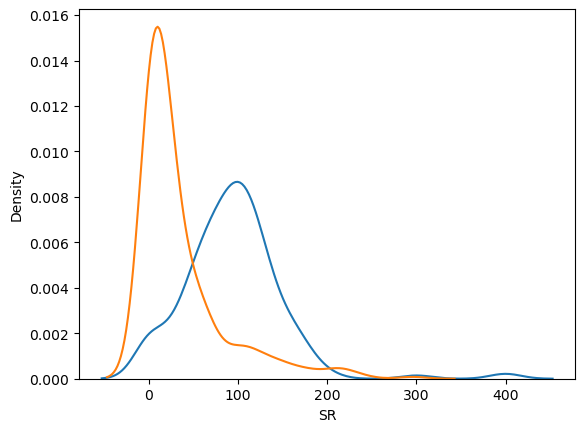

In [59]:
sns.kdeplot(overall_data['SR'])
sns.kdeplot(overall_data['Runs'])


In [40]:
overall_data['Runs'][overall_data['Balls']>80]

8       80
22     107
33     106
49     180
63     212
73     225
91     128
97     116
98     239
99     296
100    153
110    100
113    204
116    170
136     80
138    138
144    106
145    136
150     91
163    145
165    201
169    178
174    124
186    175
199    121
220    141
228    120
232    100
238    146
242    155
246    214
295    112
305    101
307    154
309    219
Name: Runs, dtype: int64

In [82]:
bowling_summary


,S.NO.,Bowler,Overs,Maidens,Runs,Wickets,ECON,0s,4s,6s,WD,NB,Country
0,1,Maheesh Theekshana,4.0,0,23,1,5.75,7,0,0,2,0,Sri Lanka
1,2,Dushmantha Chameera,4.0,0,39,1,9.75,6,3,1,2,0,Sri Lanka
2,3,Pramod Madushan,4.0,0,37,2,9.25,6,3,1,0,0,Sri Lanka
3,4,Chamika Karunaratne,4.0,0,36,1,9.00,7,3,1,1,0,Sri Lanka
4,5,Wanindu Hasaranga de Silva,4.0,0,27,1,6.75,8,1,1,0,0,Sri Lanka
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2,Naseem Shah,4.0,0,30,0,7.50,15,3,1,1,0,Pakistan
496,3,Haris Rauf,4.0,0,23,2,5.75,13,3,0,1,0,Pakistan
497,4,Shadab Khan,4.0,0,20,1,5.00,10,1,0,0,0,Pakistan
498,5,Mohammad Wasim,4.0,0,38,1,9.50,5,5,0,2,0,Pakistan


In [8]:
overall_data = batting_summary.groupby(['Country','Batter'],as_index=False).agg({'Runs':'sum','Balls':'sum','Minutes':'sum','4s':'sum','6s':'sum','SR':'mean'})

In [9]:
overall_data1

,Country,Batter,Runs,Balls,Minutes,4s,6s,SR
0,Afghanistan,Azmatullah Omarzai,11,10,14,1,0,104.165000
1,Afghanistan,Darwish Rasooli,15,13,28,1,0,115.380000
2,Afghanistan,Fareed Ahmad,2,4,7,0,0,50.000000
3,Afghanistan,Fazalhaq Farooqi,0,2,3,0,0,0.000000
4,Afghanistan,Gulbadin Naib,51,37,63,3,2,127.635000
...,...,...,...,...,...,...,...,...
195,Zimbabwe,Sikandar Raza,219,148,246,16,11,110.538750
196,Zimbabwe,Tendai Chatara,13,19,38,1,0,74.403333
197,Zimbabwe,Tony Munyonga,7,10,18,1,0,79.165000
198,Zimbabwe,Wellington Masakadza,1,7,8,0,0,14.280000


In [16]:
bowling_summary.columns

Index(['S.NO.', 'Bowler', 'Overs', 'Maidens', 'Runs', 'Wickets', 'ECON', '0s',
       '4s', '6s', 'WD', 'NB', 'Country'],
      dtype='object')

In [17]:
overall_data = bowling_summary.groupby(['Country', 'Bowler'], as_index=False).agg({'Runs':'sum'})

In [20]:
sorted_data = overall_data.sort_values(by='Runs', ascending=False)
top_10_bowl_data = sorted_data[:10]

In [21]:
top_10_bowl_data

,Country,Bowler,Runs
43,Ireland,Barry McCarthy,227
49,Ireland,Mark Adair,212
103,Sri Lanka,Maheesh Theekshana,202
105,Sri Lanka,Wanindu Hasaranga de Silva,199
122,Zimbabwe,Blessing Muzarabani,199
64,Netherlands,Paul van Meekeren,198
125,Zimbabwe,Richard Ngarava,197
62,Netherlands,Fred Klaassen,191
48,Ireland,Josh Little,189
46,Ireland,Gareth Delany,185


In [22]:
len(bowling_summary)-10

490

In [78]:
player = batting_summary[batting_summary['Batter'] == 'Virat Kohli']
range()
player

,batting_position,Batter,Dismissal,Runs,Balls,Minutes,4s,6s,SR,Country
261,3,Virat Kohli,not out,82,53,98,6,4,154.71,India
347,3,Virat Kohli,not out,62,44,79,3,2,140.90,India
436,3,Virat Kohli,c Rabada b Ngidi,12,11,13,2,0,109.09,India
521,3,Virat Kohli,not out,64,44,84,8,1,145.45,India
646,3,Virat Kohli,c Burl b Williams,26,25,36,2,0,104.00,India
675,3,Virat Kohli,c Rashid b Jordan,50,40,75,4,1,125.00,India


In [79]:
for k,m in l:
    if l['Batter'] =='Aaron Finch(c)':
        print(m)

ValueError: too many values to unpack (expected 2)

In [44]:
l

In [45]:
pd.DataFrame(l)

,0,1
0,Aaron Finch(c),batting_position Batter ...
1,Aayan Afzal Khan,batting_position Batter ...
2,Adam Zampa,batting_position Batter Dismissal R...
3,Afif Hossain,batting_position Batter ...
4,Aiden Markram,batting_position Batter ...
...,...,...
195,Wessly Madhevere,batting_position Batter ...
196,Yasir Ali,batting_position Batter ...
197,Zahoor Khan,batting_position Batter Dismissal ...
198,Zane Green(WK),batting_position Batter Di...


In [68]:
a = list(set(batting_summary['Batter']))

In [69]:
a.insert(0,'')
a

['',
 'Shakib Al Hasan(c)',
 'Divan la Cock',
 'Paul Stirling',
 'Regis Chakabva(c)(WK)',
 'Mosaddek Hossain',
 'Deepak Hooda',
 'Stephan Baard',
 'Ish Sodhi',
 'Arshdeep Singh',
 'Kusal Mendis(WK)',
 'Pat Cummins',
 'Bernard Scholtz',
 'Temba Bavuma(c)',
 'Fakhar Zaman',
 'Adam Zampa',
 'Tendai Chatara',
 'Iftikhar Ahmed',
 'Dushmantha Chameera',
 'Brad Evans',
 'Mitchell Starc',
 'Matthew Wade(c)(WK)',
 'Danushka Gunathilaka',
 'Keshav Maharaj',
 'Johnson Charles',
 'Harry Brook',
 'Mohammad Wasim',
 'Kashif Daud',
 'Wanindu Hasaranga de Silva',
 'Jason Holder',
 'Naveen-ul-Haq',
 'Andy Balbirnie(c)',
 'Shaheen Shah Afridi',
 'Ruben Trumpelmann',
 'Ravichandran Ashwin',
 'Milton Shumba',
 'Harry Tector',
 'Maheesh Theekshana',
 'Alzarri Joseph',
 'Axar Patel',
 'Darwish Rasooli',
 'George Munsey',
 'Hasan Mahmud',
 'Shamarh Brooks',
 'Obed McCoy',
 'David Miller',
 'Matthew Cross(WK)',
 'Glenn Maxwell',
 'Glenn Phillips',
 'Chirag Suri',
 'Roelof van der Merwe',
 'Tim David',
 'Liam 

In [81]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]